Names: Sriram Srinivasan, Mark Anacin Angelo Ronaldo <br>
CS 898BD Final Project Code Implementation

In [1]:
from sklearn.metrics import accuracy_score
from keras.callbacks import ModelCheckpoint
import pandas as pd
import scipy.io as sio
from os import listdir
from os.path import isfile, join
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv1D, GlobalAveragePooling1D, MaxPooling1D
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import pywt
from scipy.signal import find_peaks
from scipy.fft import fft
import librosa

In [2]:
def bool_to_dec_array(bool_array):  # Encoding labels
    dec_array = np.zeros((np.shape(bool_array)[0]))
    for i in range(np.shape(bool_array)[0]):
        max_value = max(bool_array[i, :])
        max_index = list(bool_array[i, :]).index(max_value)
        dec_array[i] = max_index
    return dec_array.astype(np.int)
     

In [3]:
dataset_dir = r"C:/Users/angel/Desktop/Notebooks/training2017/"
 # Training directory

In [4]:
onlyfiles = [f for f in listdir(dataset_dir) if (isfile(join(dataset_dir, f)) and f[0] == 'A')]
bats = [f for f in onlyfiles if f[7] == 'm']
check = 100
mats = [f for f in bats if (np.shape(sio.loadmat(dataset_dir + f)['val'])[1] >= check)]
size = len(mats)
print('Total training size is ', size)
big = 10100
X = np.zeros((size, big))

Total training size is  8528


In [5]:
def bool_to_dec_array(bool_array):  # Encoding labels
    dec_array = np.argmax(bool_array, axis=1)
    return dec_array

In [6]:
# for i in range(size):
#     dummy = sio.loadmat(dataset_dir + mats[i])['val'][0, :]
#     if (big - len(dummy)) <= 0:
#         X[i, :] = dummy[0:big]
#     else:
#         b = dummy[0:(big - len(dummy))]
#         goal = np.hstack((dummy, b))
#         while len(goal) != big:
#             b = dummy[0:(big - len(goal))]
#             goal = np.hstack((goal, b))
#         X[i, :] = goal
for i in range(size):
    dummy = sio.loadmat(dataset_dir + mats[i])['val'][0, :]
    if (big - len(dummy)) <= 0:
        X[i, :] = dummy[0:big]
    else:
        b = dummy[0:(big - len(dummy))]
        goal = np.hstack((dummy, b))
        while len(goal) != big:
            b = dummy[0:(min(big - len(goal), len(dummy)))]
            goal = np.hstack((goal, b))
        X[i, :] = goal

In [7]:
# target_train = np.zeros((size, 1))
# Train_data = pd.read_csv(dataset_dir + 'REFERENCE.csv', sep=',', header=None, names=None)
# for i in range(size):
#     if Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'N':
#         target_train[i] = 0
#     elif Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'A':
#         target_train[i] = 1
#     elif Train_data.loc[Train_data[0] == mats[i][:6], 1].values == 'O':
#         target_train[i] = 2
#     else:
#         target_train[i] = 3
# print("Normal - 0")
# print("AF - 1")
# print("Other rhythm - 2")
# print("Noisy - 3")
target_train = np.zeros((size, 1))
Train_data = pd.read_csv(dataset_dir + 'REFERENCE.csv', sep=',', header=None, names=None)
for i in range(size):
    label = Train_data.loc[Train_data[0] == mats[i][:6], 1].values[0]
    if label == 'N':
        target_train[i] = 0
    elif label == 'A':
        target_train[i] = 1
    elif label == 'O':
        target_train[i] = 2
    else:
        target_train[i] = 3

print("Normal - 0")
print("AF - 1")
print("Other rhythm - 2")
print("Noisy - 3")

Normal - 0
AF - 1
Other rhythm - 2
Noisy - 3


In [8]:
number_of_classes = 4
data_labels = np.zeros((size, number_of_classes))
for i in range(size):
    dummy = np.zeros((number_of_classes))
    dummy[int(target_train[i])] = 1
    data_labels[i, :] = dummy

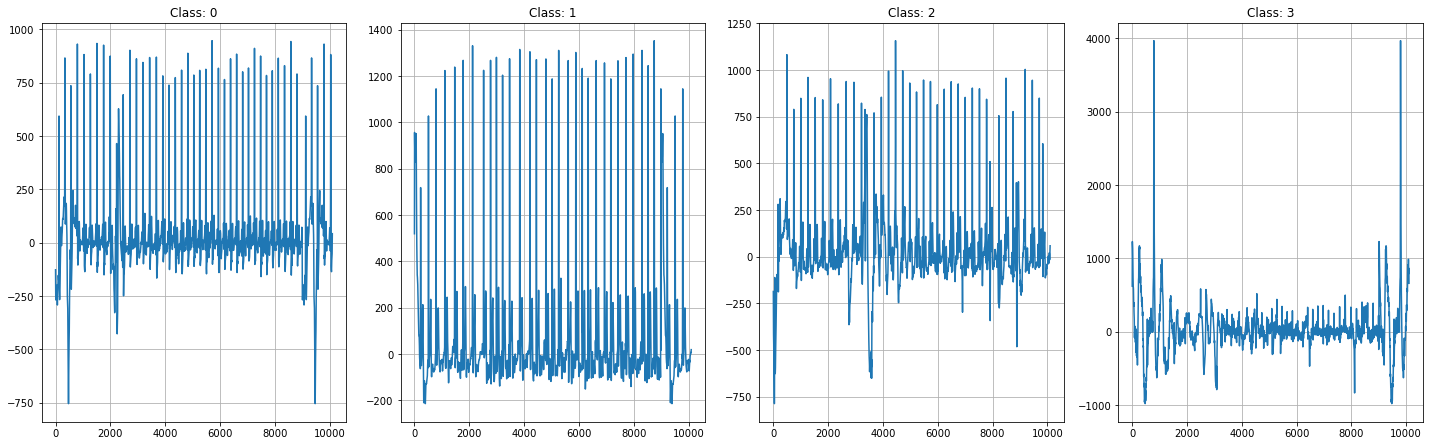

In [9]:
plt.figure(figsize=(20, 12))

# Iterate over each class
for class_label in range(number_of_classes):
    # Find the first sample index belonging to the current class
    class_index = np.where(target_train == class_label)[0][0]
    
    # Plot the signal from this class
    plt.subplot(2, number_of_classes, class_label + 1)
    plt.plot(X[class_index])
    plt.title("Class: " + str(class_label))
    plt.grid()

plt.tight_layout()
plt.show()


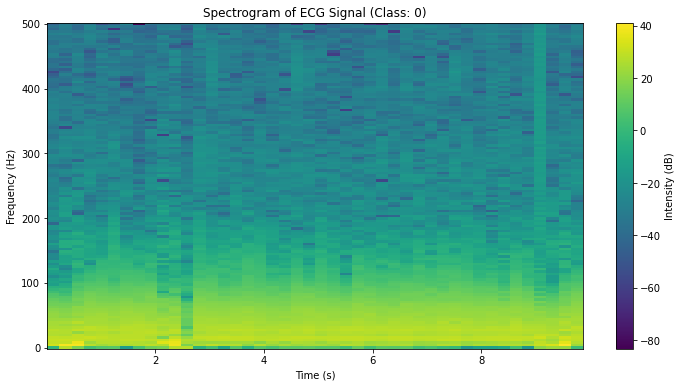

In [10]:
# Choose a class and find the index of a sample belonging to that class
class_label = 0  # Choose the class label (0, 1, 2, or 3)
class_indices = np.where(target_train == class_label)[0]
sample_index = class_indices[0]  # Choose the index of the sample in this class

# Compute the spectrogram of the selected signal
f, t, Sxx = spectrogram(X[sample_index], fs=1000)  # Assuming a sampling frequency of 1000 Hz

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Use logarithmic scale for better visualization
plt.colorbar(label='Intensity (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram of ECG Signal (Class: ' + str(class_label) + ')')
plt.show()


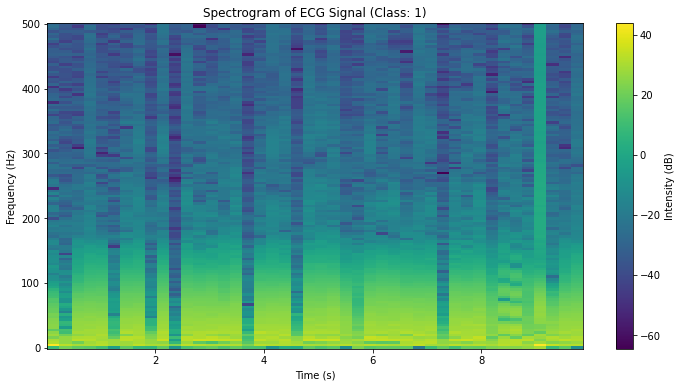

In [11]:
# Choose a class and find the index of a sample belonging to that class
class_label = 1  # Choose the class label (0, 1, 2, or 3)
class_indices = np.where(target_train == class_label)[0]
sample_index = class_indices[0]  # Choose the index of the sample in this class

# Compute the spectrogram of the selected signal
f, t, Sxx = spectrogram(X[sample_index], fs=1000)  # Assuming a sampling frequency of 1000 Hz

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Use logarithmic scale for better visualization
plt.colorbar(label='Intensity (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram of ECG Signal (Class: ' + str(class_label) + ')')
plt.show()


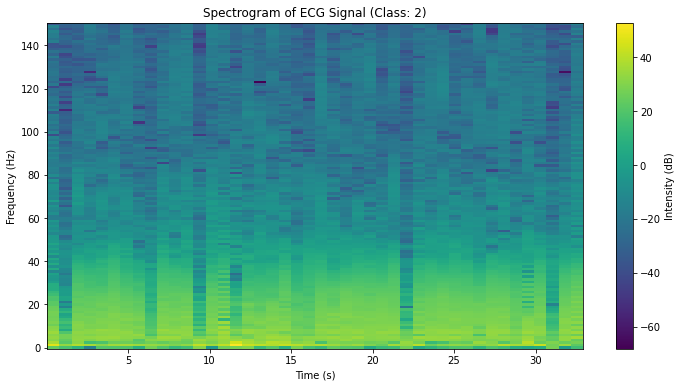

In [12]:
# Choose a class and find the index of a sample belonging to that class
class_label = 2  # Choose the class label (0, 1, 2, or 3)
class_indices = np.where(target_train == class_label)[0]
sample_index = class_indices[0]  # Choose the index of the sample in this class

# Compute the spectrogram of the selected signal
f, t, Sxx = spectrogram(X[sample_index], fs=300)  # Assuming a sampling frequency of 1000 Hz

# Plot the spectrogram
plt.figure(figsize=(12, 6))
plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Use logarithmic scale for better visualization
plt.colorbar(label='Intensity (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('Spectrogram of ECG Signal (Class: ' + str(class_label) + ')')
plt.show()


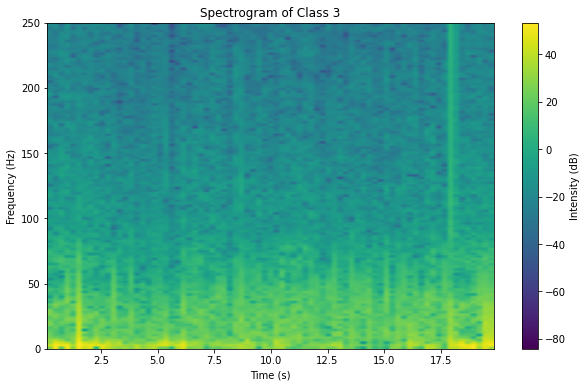

In [13]:
# Choose the class and find the index of the first sample belonging to that class
class_label = 3  # Change this to the desired class label
class_index = np.where(target_train == class_label)[0][0]

# Extract the signal from the chosen class
signal = X[class_index]

# Compute and plot the spectrogram
plt.figure(figsize=(10, 6))
plt.specgram(signal, Fs=500)  # Assuming a sampling frequency of 1000 Hz, adjust if necessary
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Class {}'.format(class_label))
plt.colorbar(label='Intensity (dB)')
plt.show()


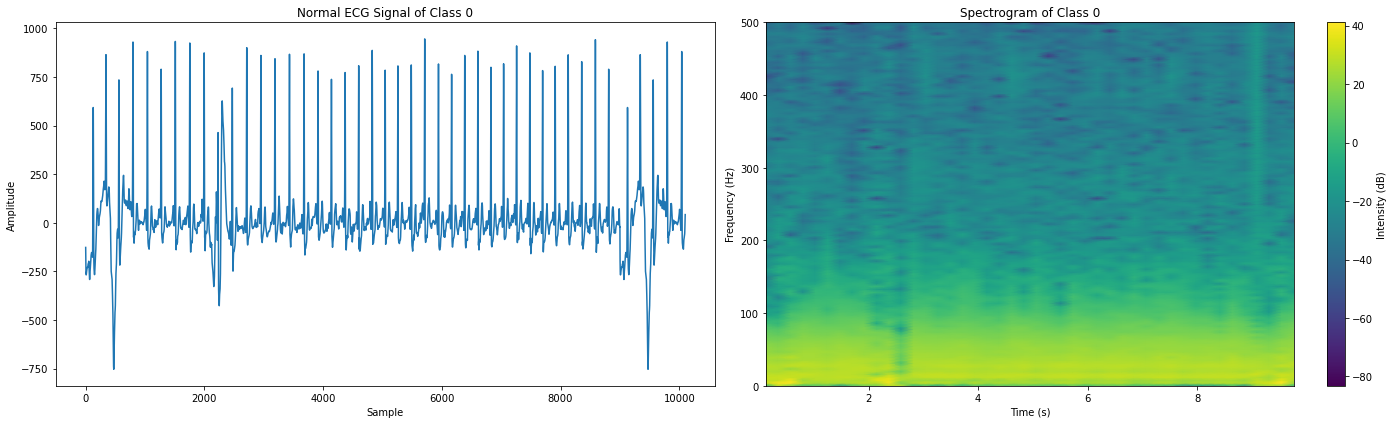

In [14]:
# Choose the class and find the index of the first sample belonging to that class
class_label = 0  # Change this to the desired class label
class_index = np.where(target_train == class_label)[0][0]

# Extract the signal from the chosen class
signal = X[class_index]

# Compute the spectrogram
frequencies, times, Sxx = spectrogram(signal, fs=1000)  # Assuming a sampling frequency of 1000 Hz, adjust if necessary

# Plot the normal ECG signal and the spectrogram side by side
plt.figure(figsize=(20, 6))

# Plot the normal ECG signal
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Normal ECG Signal of Class {}'.format(class_label))

# Plot the spectrogram
plt.subplot(1, 2, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')  # Using a logarithmic scale for better visualization
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Class {}'.format(class_label))
plt.colorbar(label='Intensity (dB)')

plt.tight_layout()
plt.show()


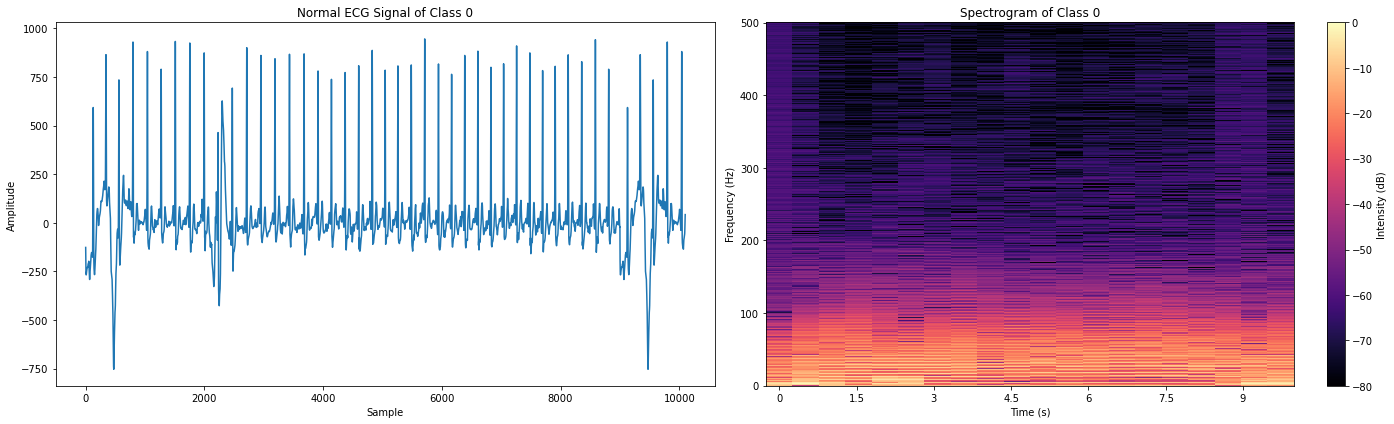

In [15]:
# Choose the class and find the index of the first sample belonging to that class
class_label = 0  # Change this to the desired class label
class_index = np.where(target_train == class_label)[0][0]

# Extract the signal from the chosen class
signal = X[class_index]

# Compute the spectrogram
Sxx = np.abs(librosa.stft(signal))

# Convert the spectrogram to dB scale
Sxx_db = librosa.amplitude_to_db(Sxx, ref=np.max)

# Plot the normal ECG signal and the spectrogram side by side
plt.figure(figsize=(20, 6))

# Plot the normal ECG signal
plt.subplot(1, 2, 1)
plt.plot(signal)
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.title('Normal ECG Signal of Class {}'.format(class_label))

# Plot the spectrogram
plt.subplot(1, 2, 2)
librosa.display.specshow(Sxx_db, sr=1000, x_axis='time', y_axis='linear')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Class {}'.format(class_label))
plt.colorbar(label='Intensity (dB)')

plt.tight_layout()
plt.show()

Number of peaks: 72
Mean amplitude: 15.909603960396039
Max amplitude: 946.0
Min amplitude: -754.0


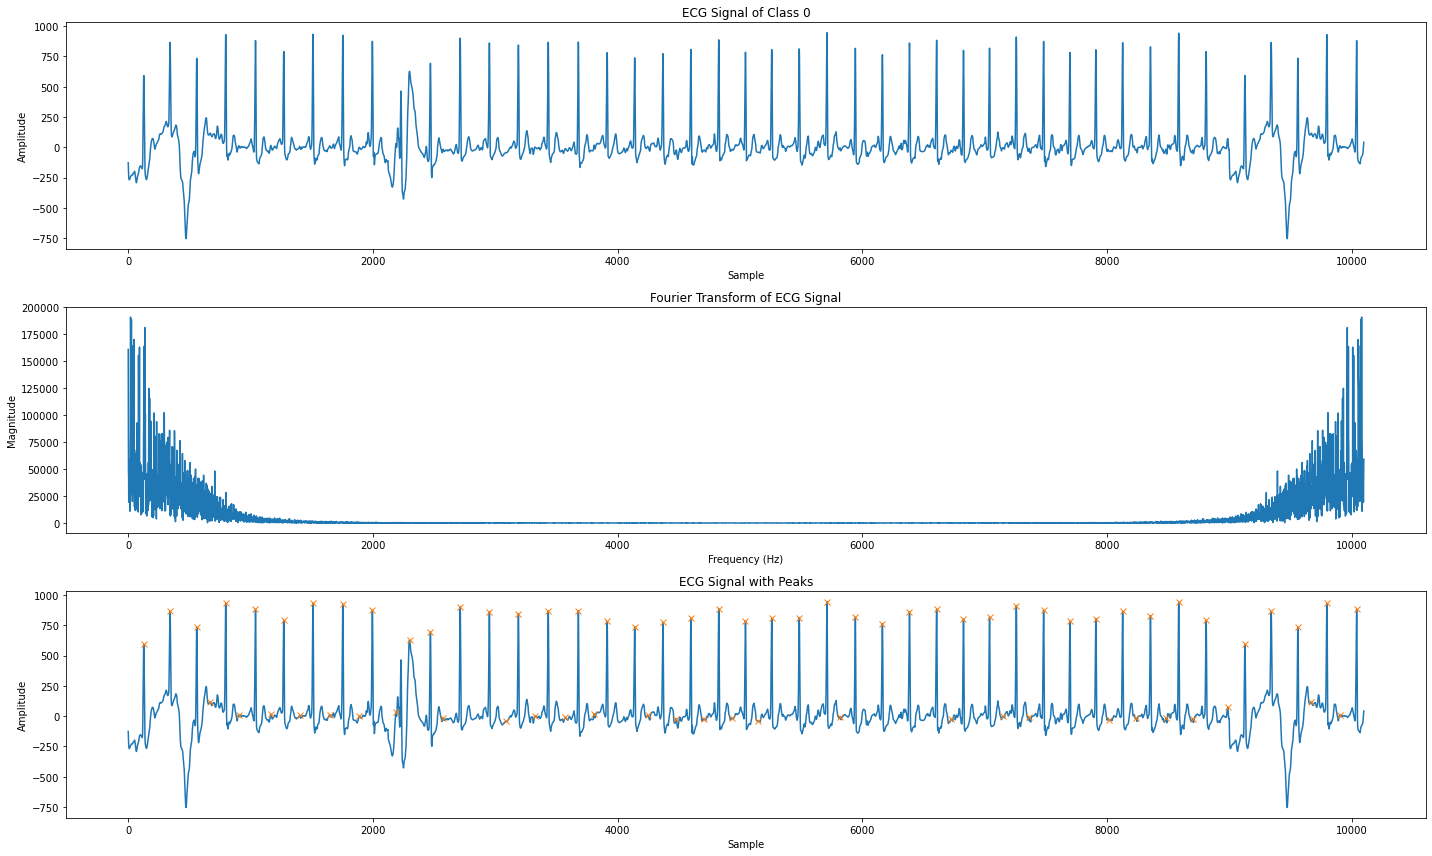

In [16]:
# Choose the class and find the index of the first sample belonging to that class
class_label = 0  # Change this to the desired class label
class_index = np.where(target_train == class_label)[0][0]

# Extract the signal from the chosen class
signal = X[class_index]

# Wavelet Transform
coeffs = pywt.wavedec(signal, 'db4', level=6)
cA6, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

# Fourier Transform
fft_signal = fft(signal)

# Time-domain features
peaks, _ = find_peaks(signal, distance=100)
num_peaks = len(peaks)
mean_amp = np.mean(signal)
max_amp = np.max(signal)
min_amp = np.min(signal)

print("Number of peaks:", num_peaks)
print("Mean amplitude:", mean_amp)
print("Max amplitude:", max_amp)
print("Min amplitude:", min_amp)

# Plotting
plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.plot(signal)
plt.title('ECG Signal of Class {}'.format(class_label))
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(np.abs(fft_signal))
plt.title('Fourier Transform of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 3)
plt.plot(signal)
plt.plot(peaks, signal[peaks], "x")
plt.title('ECG Signal with Peaks')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


Number of peaks: 63
Mean amplitude: 45.12673267326733
Max amplitude: 1352.0
Min amplitude: -214.0


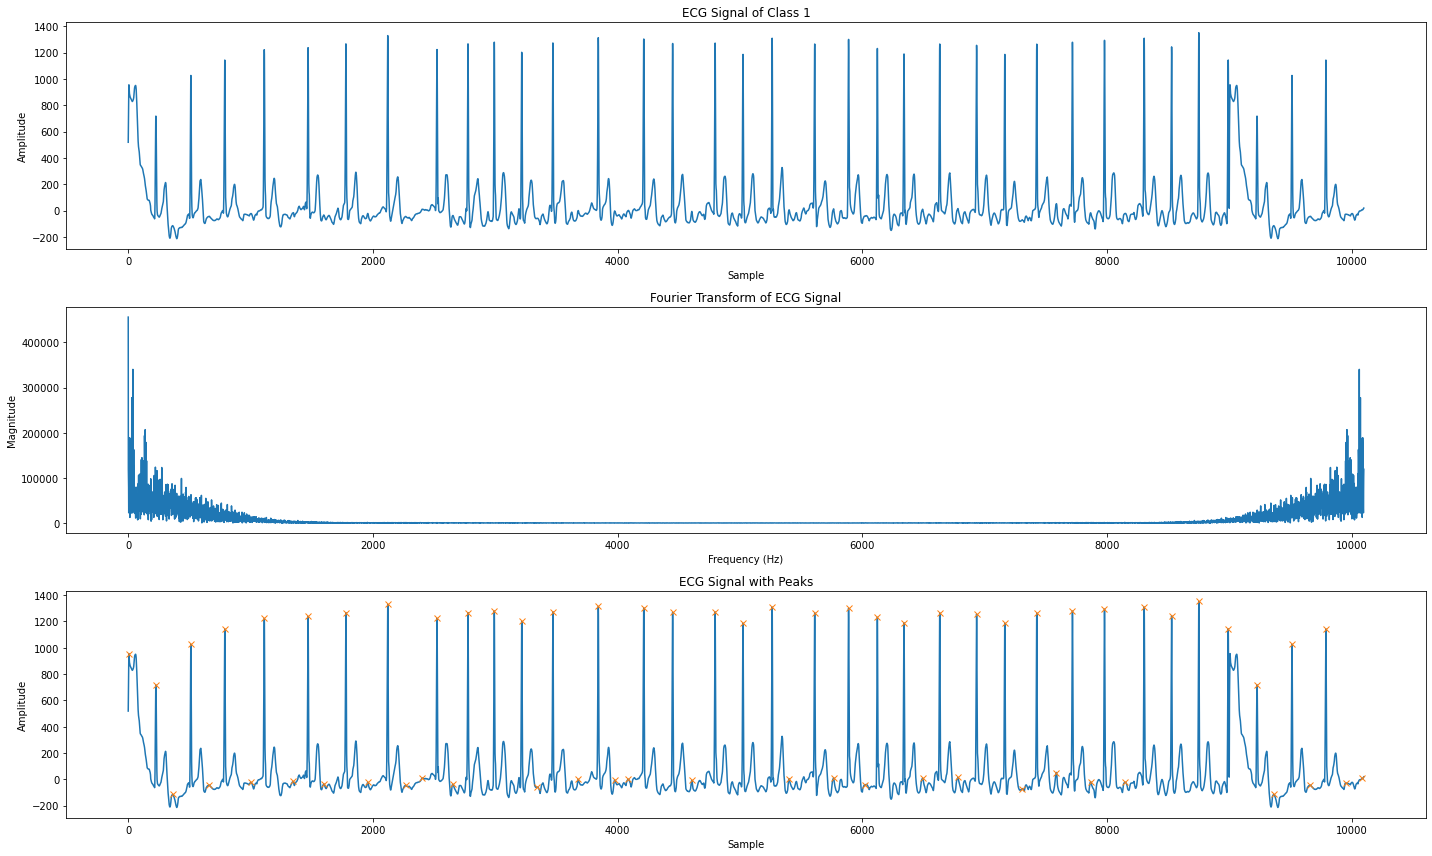

In [17]:
# Choose the class and find the index of the first sample belonging to that class
class_label = 1  # Change this to the desired class label
class_index = np.where(target_train == class_label)[0][0]

# Extract the signal from the chosen class
signal = X[class_index]

# Wavelet Transform
coeffs = pywt.wavedec(signal, 'db4', level=6)
cA6, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

# Fourier Transform
fft_signal = fft(signal)

# Time-domain features
peaks, _ = find_peaks(signal, distance=100)
num_peaks = len(peaks)
mean_amp = np.mean(signal)
max_amp = np.max(signal)
min_amp = np.min(signal)

print("Number of peaks:", num_peaks)
print("Mean amplitude:", mean_amp)
print("Max amplitude:", max_amp)
print("Min amplitude:", min_amp)

# Plotting
plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.plot(signal)
plt.title('ECG Signal of Class {}'.format(class_label))
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(np.abs(fft_signal))
plt.title('Fourier Transform of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 3)
plt.plot(signal)
plt.plot(peaks, signal[peaks], "x")
plt.title('ECG Signal with Peaks')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


Number of peaks: 76
Mean amplitude: 19.626336633663367
Max amplitude: 1157.0
Min amplitude: -788.0


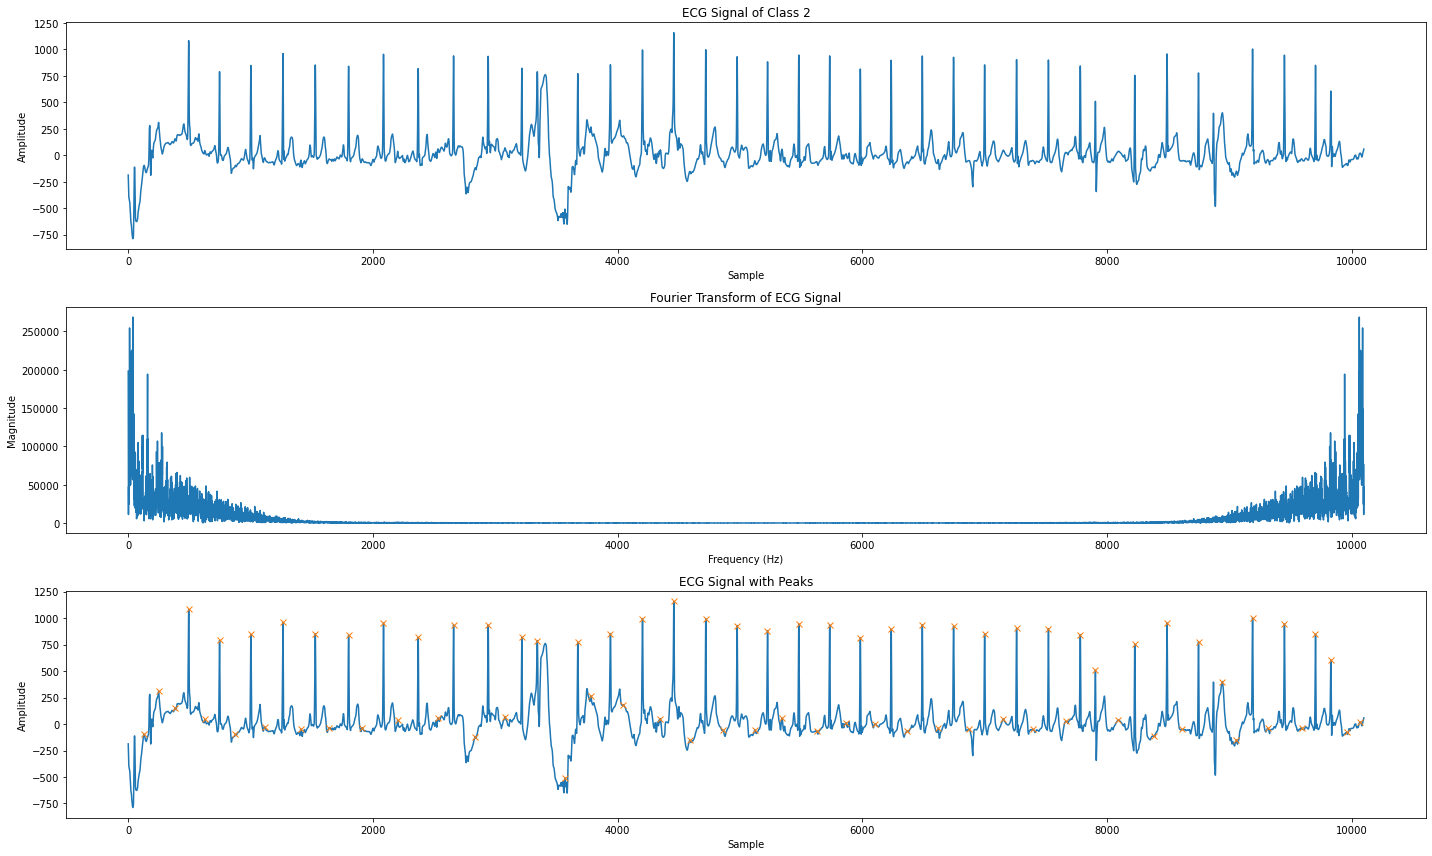

In [18]:
# Choose the class and find the index of the first sample belonging to that class
class_label = 2  # Change this to the desired class label
class_index = np.where(target_train == class_label)[0][0]

# Extract the signal from the chosen class
signal = X[class_index]

# Wavelet Transform
coeffs = pywt.wavedec(signal, 'db4', level=6)
cA6, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

# Fourier Transform
fft_signal = fft(signal)

# Time-domain features
peaks, _ = find_peaks(signal, distance=100)
num_peaks = len(peaks)
mean_amp = np.mean(signal)
max_amp = np.max(signal)
min_amp = np.min(signal)

print("Number of peaks:", num_peaks)
print("Mean amplitude:", mean_amp)
print("Max amplitude:", max_amp)
print("Min amplitude:", min_amp)

# Plotting
plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.plot(signal)
plt.title('ECG Signal of Class {}'.format(class_label))
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(np.abs(fft_signal))
plt.title('Fourier Transform of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 3)
plt.plot(signal)
plt.plot(peaks, signal[peaks], "x")
plt.title('ECG Signal with Peaks')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


Number of peaks: 66
Mean amplitude: 30.90287128712871
Max amplitude: 3969.0
Min amplitude: -981.0


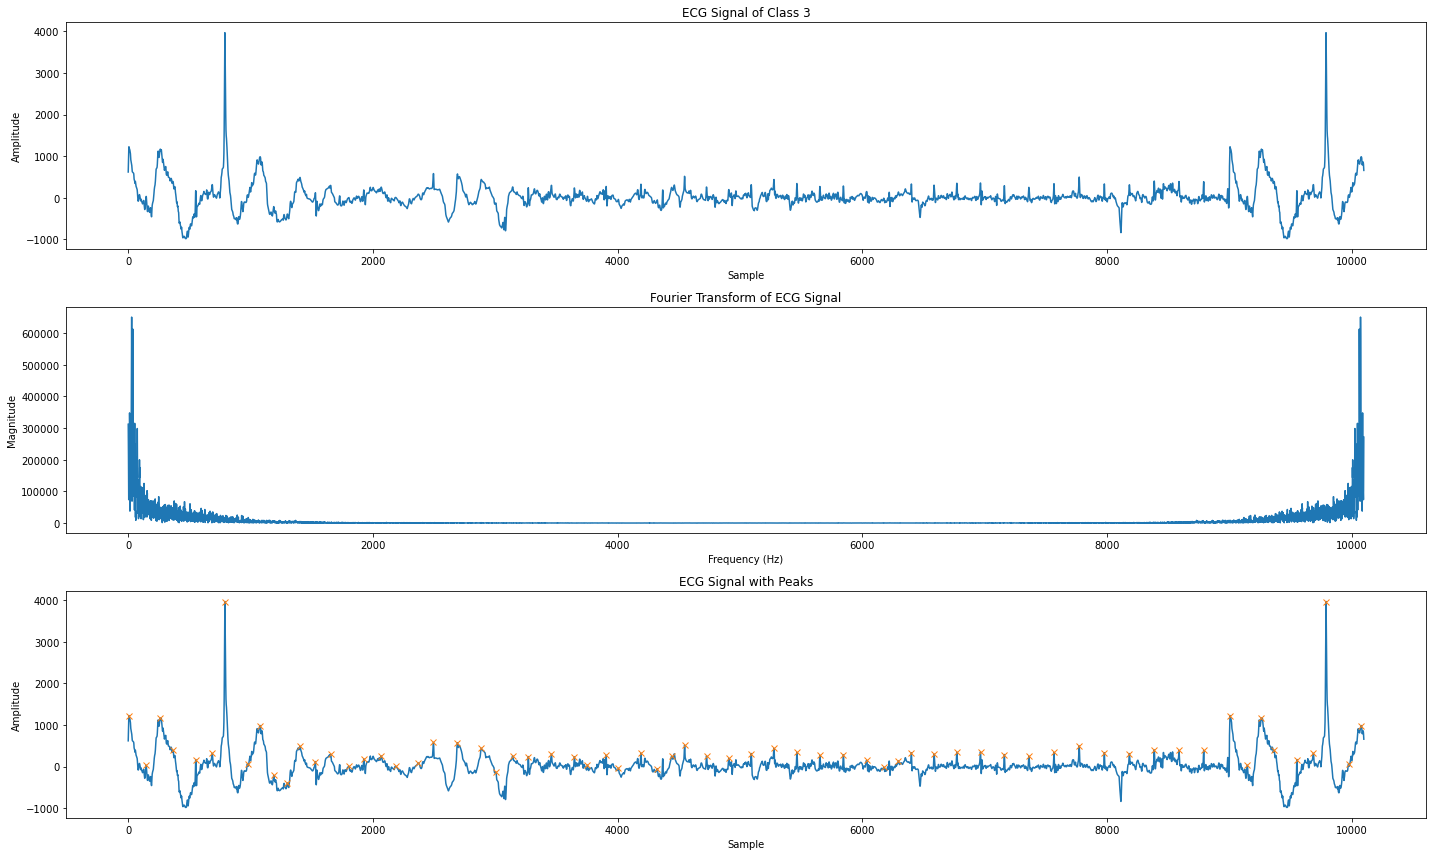

In [19]:
# Choose the class and find the index of the first sample belonging to that class
class_label = 3  # Change this to the desired class label
class_index = np.where(target_train == class_label)[0][0]

# Extract the signal from the chosen class
signal = X[class_index]

# Wavelet Transform
coeffs = pywt.wavedec(signal, 'db4', level=6)
cA6, cD6, cD5, cD4, cD3, cD2, cD1 = coeffs

# Fourier Transform
fft_signal = fft(signal)

# Time-domain features
peaks, _ = find_peaks(signal, distance=100)
num_peaks = len(peaks)
mean_amp = np.mean(signal)
max_amp = np.max(signal)
min_amp = np.min(signal)

print("Number of peaks:", num_peaks)
print("Mean amplitude:", mean_amp)
print("Max amplitude:", max_amp)
print("Min amplitude:", min_amp)

# Plotting
plt.figure(figsize=(20, 12))

plt.subplot(3, 1, 1)
plt.plot(signal)
plt.title('ECG Signal of Class {}'.format(class_label))
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(np.abs(fft_signal))
plt.title('Fourier Transform of ECG Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')

plt.subplot(3, 1, 3)
plt.plot(signal)
plt.plot(peaks, signal[peaks], "x")
plt.title('ECG Signal with Peaks')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


In [20]:
X_raw = X
X = (X - X.mean())/(X.std()) # Mean normalization
X = np.expand_dims(X, axis=2) # For Keras's data input size

Text(0.5, 1.0, 'Class: N')

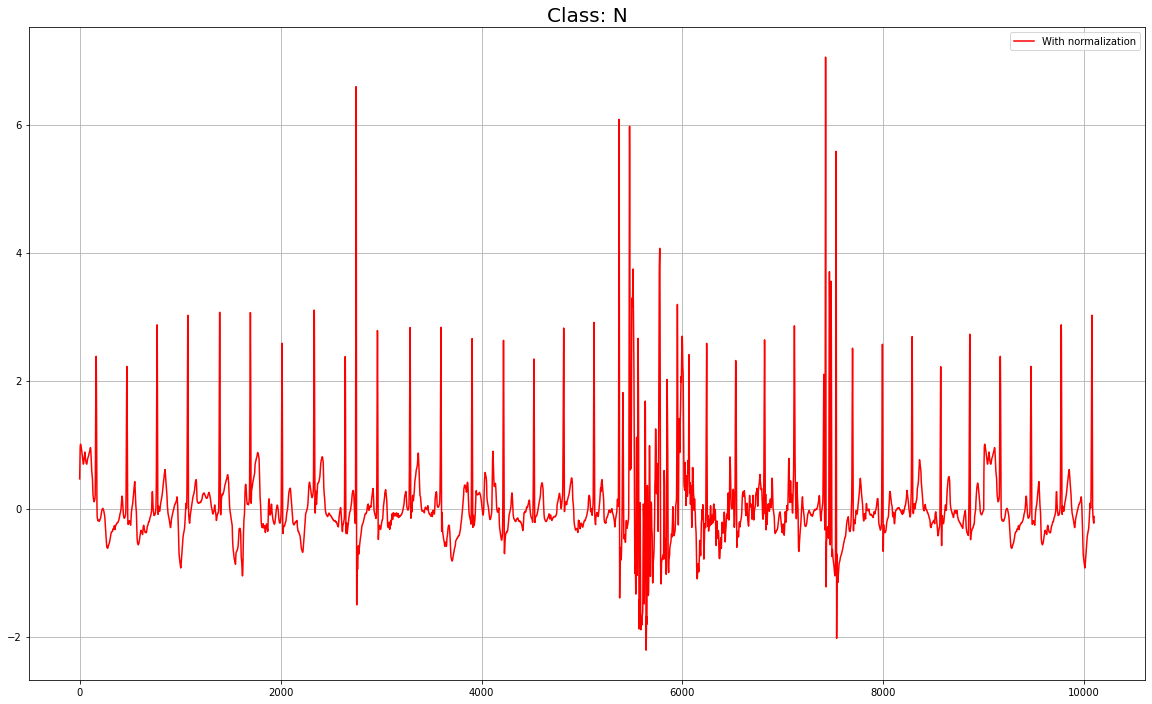

In [21]:
plt.figure(figsize=(20,12))
plot = plt.plot(X[1], color="red", label="With normalization")
plt.grid()
plt.legend()
title = "Class: " + str(label)
plt.title(title, fontsize=20)

Text(0.5, 1.0, 'Class: N')

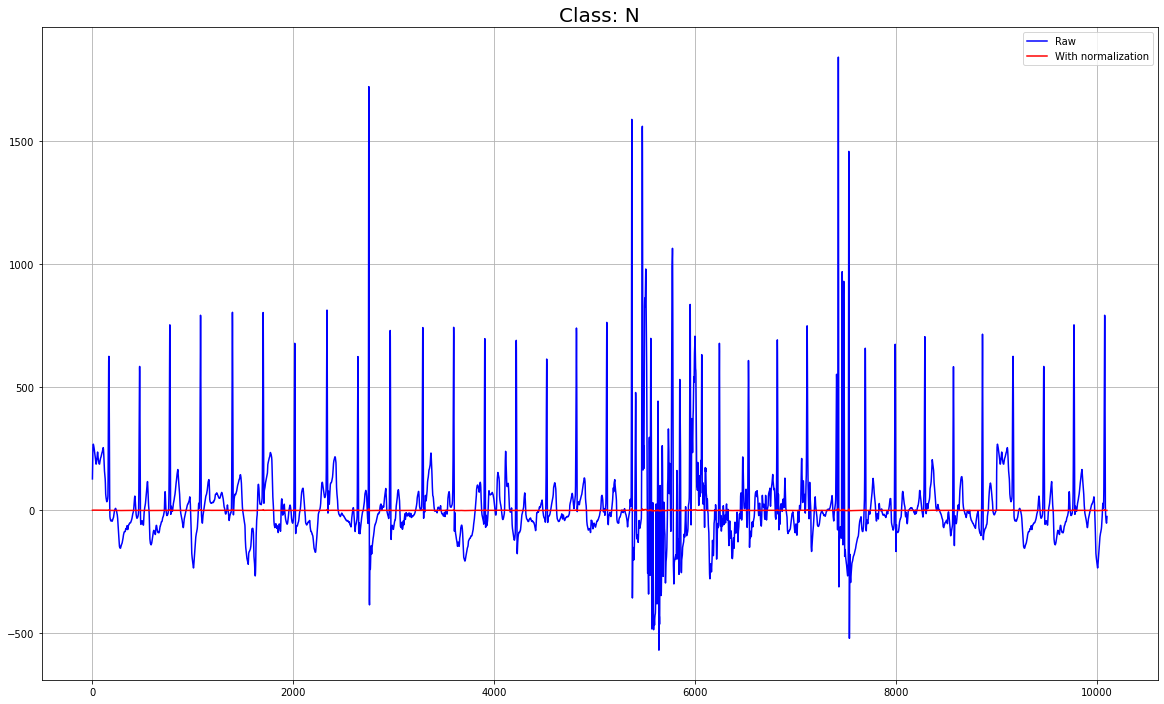

In [22]:
plt.figure(figsize=(20,12))
plot = plt.plot(X_raw[1], color="blue", label="Raw")
plot = plt.plot(X[1], color="red", label="With normalization")
plt.legend()
plt.grid()
title = "Class: " + str(label)
plt.title(title, fontsize=20)
     

In [23]:
X_norm = X
values = [i for i in range(size)]
permutations = np.random.permutation(values)
X = X[permutations, :]
data_labels = data_labels[permutations, :]

Text(0.5, 1.0, 'Class: N')

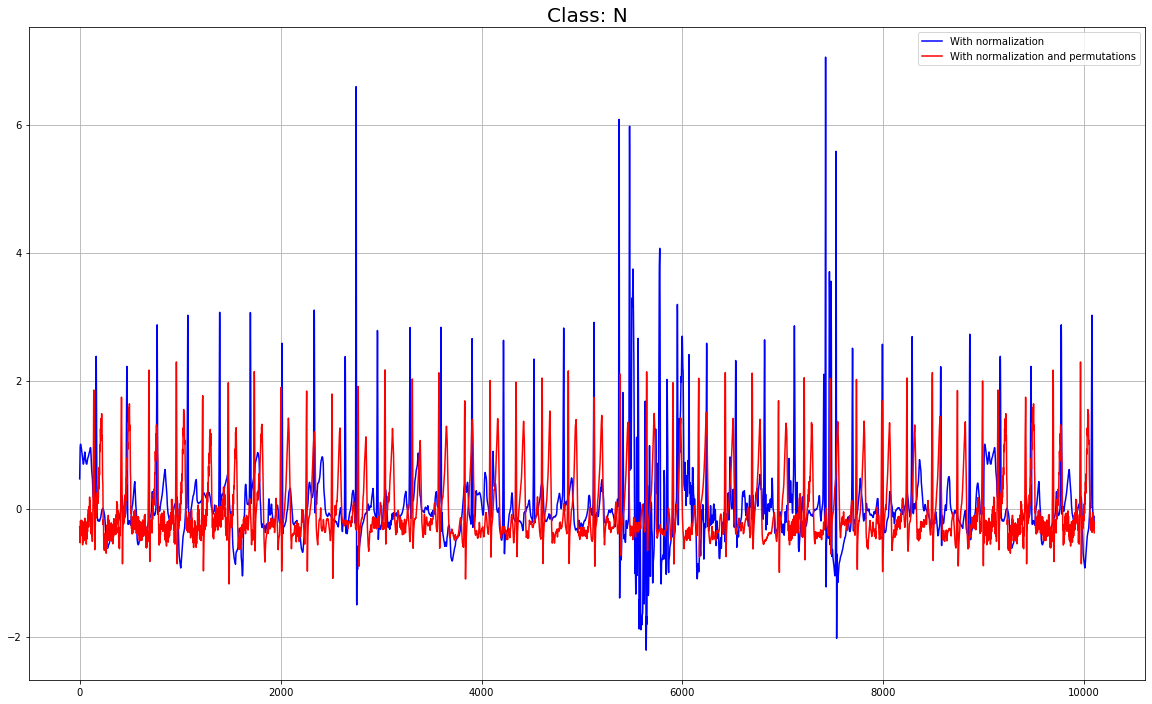

In [24]:
plt.figure(figsize=(20,12))
plot = plt.plot(X_norm[1], color="blue", label="With normalization")
plot = plt.plot(X[1], color="red", label="With normalization and permutations")
plt.legend()
plt.grid()
title = "Class: " + str(label)
plt.title(title, fontsize=20)

In [25]:
train_size = 0.7 
X_train = X[:int(train_size * size), :]
y_train = data_labels[:int(train_size * size), :]
X_val = X[int(train_size * size):, :]
y_val = data_labels[int(train_size * size):, :]



In [26]:
model = Sequential([
    Conv1D(128, 55, activation='relu', input_shape=(big, 1)),
    MaxPooling1D(10),
    Dropout(0.5),

    Conv1D(128, 25, activation='relu'),
    MaxPooling1D(5),
    Dropout(0.5),

    Conv1D(128, 10, activation='relu'),
    MaxPooling1D(5),
    Dropout(0.5),

    Conv1D(128, 5, activation='relu'),
    GlobalAveragePooling1D(),

    Dense(256, kernel_initializer='normal', activation='relu'),
    Dropout(0.5),

    Dense(128, kernel_initializer='normal', activation='relu'),
    Dropout(0.5),

    Dense(64, kernel_initializer='normal', activation='relu'),
    Dropout(0.5),

    Dense(number_of_classes, kernel_initializer='normal', activation='softmax'),
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10046, 128)        7168      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1004, 128)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 1004, 128)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, 980, 128)          409728    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 196, 128)         0         
 1D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 196, 128)          0

In [28]:
import keras
# Step 5: Compile the model
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.RMSprop(lr=1e-4), metrics=["accuracy",keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])


c:\Users\angel\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [29]:
checkpointer = ModelCheckpoint(filepath='models/Best_model.h5', monitor='val_acc', verbose=1, save_best_only=True)

In [30]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=65, verbose=2, shuffle=True, callbacks=[checkpointer] ) 
     

Epoch 1/65
187/187 - 153s - loss: 1.1524 - accuracy: 0.5644 - precision: 0.5771 - recall: 0.2307 - auc: 0.7829 - val_loss: 1.1075 - val_accuracy: 0.5991 - val_precision: 0.6295 - val_recall: 0.0551 - val_auc: 0.8050 - 153s/epoch - 820ms/step
Epoch 2/65
187/187 - 142s - loss: 1.0400 - accuracy: 0.5810 - precision: 0.6243 - recall: 0.3527 - auc: 0.8128 - val_loss: 0.9836 - val_accuracy: 0.5991 - val_precision: 0.7209 - val_recall: 0.3392 - val_auc: 0.8363 - 142s/epoch - 757ms/step
Epoch 3/65
187/187 - 135s - loss: 0.9652 - accuracy: 0.5850 - precision: 0.6714 - recall: 0.4331 - auc: 0.8341 - val_loss: 0.9205 - val_accuracy: 0.5991 - val_precision: 0.6996 - val_recall: 0.4842 - val_auc: 0.8491 - 135s/epoch - 721ms/step
Epoch 4/65
187/187 - 132s - loss: 0.9261 - accuracy: 0.5887 - precision: 0.6889 - recall: 0.4808 - auc: 0.8452 - val_loss: 0.8962 - val_accuracy: 0.5991 - val_precision: 0.6996 - val_recall: 0.5569 - val_auc: 0.8573 - 132s/epoch - 707ms/step
Epoch 5/65
187/187 - 132s - loss

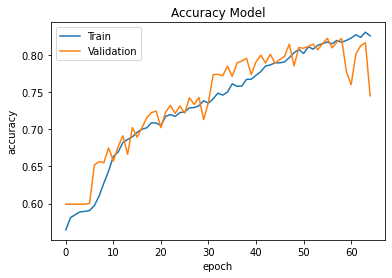

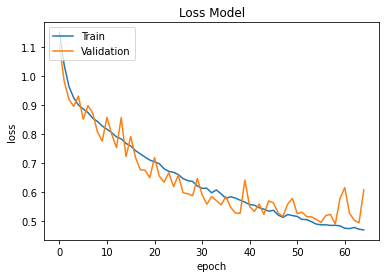

In [31]:
# Step 7: Graphically show the results obtained from training the model
# Summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [32]:
model1 = Sequential([
    Conv1D(128, 55, activation='relu', input_shape=(big, 1)),
    MaxPooling1D(10),
    Dropout(0.5),

    Conv1D(128, 25, activation='relu'),
    MaxPooling1D(5),
    Dropout(0.5),

    Conv1D(128, 10, activation='relu'),
    MaxPooling1D(5),
    Dropout(0.5),

    Conv1D(128, 5, activation='relu'),
    GlobalAveragePooling1D(),

    Dense(256, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.01)),
    Dropout(0.5),

    Dense(128, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.1)),
    Dropout(0.5),

    Dense(64, kernel_initializer='normal', activation=keras.layers.LeakyReLU(alpha=0.1)),
    Dropout(0.5),

    Dense(number_of_classes, kernel_initializer='normal', activation='softmax'),
])

In [33]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 10046, 128)        7168      
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 1004, 128)        0         
 1D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 1004, 128)         0         
                                                                 
 conv1d_5 (Conv1D)           (None, 980, 128)          409728    
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 196, 128)         0         
 1D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 196, 128)         

In [34]:
# Step 5: Compile the model
model1.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy",keras.metrics.Precision(), keras.metrics.Recall(), keras.metrics.AUC()])


In [35]:
history1 = model1.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=32, epochs=100, verbose=2, shuffle=True, callbacks=[checkpointer] ) 

Epoch 1/100
187/187 - 150s - loss: 1.0011 - accuracy: 0.5770 - precision_1: 0.6758 - recall_1: 0.3932 - auc_1: 0.8255 - val_loss: 0.8519 - val_accuracy: 0.5991 - val_precision_1: 0.7786 - val_recall_1: 0.5029 - val_auc_1: 0.8684 - 150s/epoch - 804ms/step
Epoch 2/100
187/187 - 125s - loss: 0.8425 - accuracy: 0.6472 - precision_1: 0.7489 - recall_1: 0.5167 - auc_1: 0.8757 - val_loss: 0.7068 - val_accuracy: 0.6889 - val_precision_1: 0.7844 - val_recall_1: 0.5830 - val_auc_1: 0.9118 - 125s/epoch - 670ms/step
Epoch 3/100
187/187 - 117s - loss: 0.7181 - accuracy: 0.7053 - precision_1: 0.7723 - recall_1: 0.6164 - auc_1: 0.9098 - val_loss: 0.6212 - val_accuracy: 0.7413 - val_precision_1: 0.7873 - val_recall_1: 0.6987 - val_auc_1: 0.9333 - 117s/epoch - 626ms/step
Epoch 4/100
187/187 - 118s - loss: 0.6704 - accuracy: 0.7340 - precision_1: 0.7849 - recall_1: 0.6628 - auc_1: 0.9225 - val_loss: 0.6073 - val_accuracy: 0.7726 - val_precision_1: 0.8379 - val_recall_1: 0.6667 - val_auc_1: 0.9393 - 118s

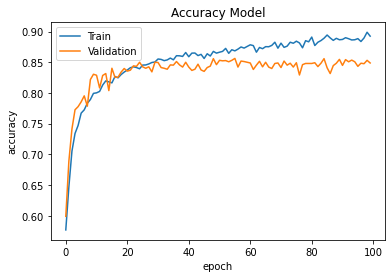

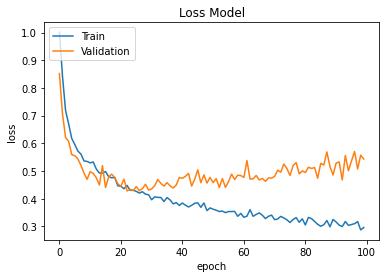

In [36]:
# Step 7: Graphically show the results obtained from training the model
# Summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [40]:
# Step 2: Evaluate model on the testing set (X_val, y_val)
test_loss, test_acc, test_prec, test_recall, test_auc = model.evaluate(X_val, y_val)

# Calculate F1 score
f1score = 2 * (test_prec * test_recall) / (test_prec + test_recall)

# Step 3: Print the evaluation metrics
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Test Precision:', test_prec)
print('Test Recall:', test_recall)
print('Test AUC:', test_auc)
print('Test F1 Score:', f1score)


80/80 [==============================] - 11s 140ms/step - loss: 0.6080 - accuracy: 0.7452 - precision: 0.8359 - recall: 0.6628 - auc: 0.9370
Test Loss: 0.6080242395401001
Test Accuracy: 0.745212972164154
Test Precision: 0.8358797430992126
Test Recall: 0.6627588868141174
Test AUC: 0.9369827508926392
Test F1 Score: 0.7393199627837473


In [41]:
# Step 2: Evaluate model on the testing set (X_val, y_val)
test_loss, test_acc, test_prec, test_recall, test_auc = model1.evaluate(X_val, y_val)

# Calculate F1 score
f1score = 2 * (test_prec * test_recall) / (test_prec + test_recall)

# Step 3: Print the evaluation metrics
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)
print('Test Precision:', test_prec)
print('Test Recall:', test_recall)
print('Test AUC:', test_auc)
print('Test F1 Score:', f1score)


80/80 [==============================] - 11s 139ms/step - loss: 0.5436 - accuracy: 0.8488 - precision_1: 0.8601 - recall_1: 0.8339 - auc_1: 0.9598
Test Loss: 0.5435723066329956
Test Accuracy: 0.8487690687179565
Test Precision: 0.8601370453834534
Test Recall: 0.8339195251464844
Test AUC: 0.9597511887550354
Test F1 Score: 0.8468254117661338
